House Price Prediction Model

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns

In [122]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [124]:
df["mainroad"] = df["mainroad"].map({"yes":1,"no":0})

In [125]:
df["guestroom"] = df["guestroom"].map({"yes":1,"no":0})

In [126]:
df["basement"] = df["basement"].map({"yes":1,"no":0})

In [127]:
df["hotwaterheating"] = df["hotwaterheating"].map({"yes":1,"no":0})

In [128]:
df["airconditioning"] = df["airconditioning"].map({"yes":1,"no":0})

In [129]:
df["prefarea"] = df["prefarea"].map({"yes":1,"no":0})

In [130]:
df["furnishingstatus"].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [131]:
df["furnishingstatus"] = df["furnishingstatus"].map({"furnished":1,"semi-furnished":2,"unfurnished":3})

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [133]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,3
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,3
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


In [134]:
df.drop_duplicates()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,3
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,3
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


In [135]:
x = df.drop("price",axis=1)
y = df["price"]

In [136]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,1
1,8960,4,4,4,1,0,0,0,1,3,0,1
2,9960,3,2,2,1,0,1,0,0,2,1,2
3,7500,4,2,2,1,0,1,0,1,3,1,1
4,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,3
541,2400,3,1,1,0,0,0,0,0,0,0,2
542,3620,2,1,1,1,0,0,0,0,0,0,3
543,2910,3,1,1,0,0,0,0,0,0,0,1


In [137]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [140]:
x_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
252,9860,3,1,1,1,0,0,0,0,0,0,2
46,6000,3,2,4,1,0,0,0,1,1,0,1
387,4240,3,1,2,1,0,0,0,1,0,0,2
294,4000,4,2,2,0,0,0,0,0,0,0,2
298,5800,3,1,1,1,0,0,1,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
351,3600,2,1,1,1,0,0,0,0,0,0,2
25,6540,4,2,2,1,1,1,0,1,2,1,1
23,4560,3,2,2,1,1,1,0,1,1,0,1
71,6000,4,2,4,1,0,0,0,1,0,0,3


In [141]:
x_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
87,3960,3,1,1,1,0,1,0,0,2,0,2
44,6000,4,2,4,1,0,0,0,1,1,0,1
188,5720,2,1,2,1,0,0,0,1,0,1,3
35,7000,3,2,4,1,0,0,0,1,2,0,1
180,4500,4,2,1,0,0,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1,8960,4,4,4,1,0,0,0,1,3,0,1
221,3420,4,2,2,1,0,0,0,0,0,0,2
310,5985,3,1,1,1,0,1,0,0,0,0,2
207,3000,3,1,2,1,0,1,0,1,0,0,2


In [142]:
y_train

252    4515000
46     7525000
387    3500000
294    4200000
298    4200000
        ...   
351    3780000
25     8540000
23     8645000
71     6755000
542    1750000
Name: price, Length: 436, dtype: int64

In [143]:
y_test

87      6475000
44      7560000
188     5075000
35      8080940
180     5215000
         ...   
1      12250000
221     4767000
310     4130000
207     4900000
319     4060000
Name: price, Length: 109, dtype: int64

In [144]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [145]:
from sklearn.model_selection import GridSearchCV

In [146]:
params = {"criterion":["gini","entropy"],"max_depth":[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

In [147]:
gs = GridSearchCV(dt,param_grid=params,scoring="accuracy")

In [148]:
gs.fit(x_train,y_train)

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15]},
             scoring='accuracy')

In [149]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [150]:
from sklearn.tree import DecisionTreeClassifier
de = DecisionTreeClassifier(criterion="gini",max_depth=2)
de.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [151]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [152]:
y_pred = de.predict(x_test)
accuracy_score(y_test,y_pred)

0.01834862385321101

[Text(0.5, 0.8333333333333334, 'x[0] <= 4016.0\ngini = 0.991\nsamples = 436\nvalue = [3, 1, 1, 1, 2, 1, 3, 1, 1, 1, 3, 1, 1, 3\n1, 6, 2, 2, 3, 1, 1, 5, 1, 1, 2, 1, 1, 6\n1, 1, 1, 4, 1, 3, 3, 1, 1, 8, 1, 1, 1, 8\n1, 1, 1, 6, 3, 1, 6, 3, 1, 13, 1, 3, 2, 1\n8, 4, 2, 4, 3, 3, 1, 5, 2, 4, 3, 2, 3, 3\n3, 1, 1, 1, 2, 1, 13, 2, 5, 1, 2, 1, 3, 1\n3, 2, 5, 2, 2, 5, 2, 1, 4, 1, 6, 3, 2, 2\n1, 2, 8, 1, 1, 1, 2, 1, 1, 4, 3, 2, 2, 1\n6, 1, 1, 1, 1, 4, 2, 2, 1, 8, 1, 5, 3, 1\n2, 2, 1, 7, 1, 2, 2, 1, 1, 2, 3, 1, 1, 1\n4, 1, 1, 2, 3, 1, 2, 1, 6, 1, 1, 1, 2, 1\n1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 2, 1, 1, 2\n1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 2, 1\n1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1\n1]'),
 Text(0.25, 0.5, 'x[4] <= 0.5\ngini = 0.982\nsamples = 166\nvalue = [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 0.0, 1.0\n3.0, 1.0, 1.0, 3.0, 1.0, 4.0, 1.0, 2.0, 2.0, 1.0\n1.0, 5.0, 1.0, 0.0, 1.0, 0.0, 0.0, 5.0, 1.0, 0.0\n0.0, 3.0, 1.0, 2.0, 3.0, 1.0, 0.0, 6.0, 0.0, 1.0\n1.0, 5.0, 0.0, 1.0, 1.0, 5.0, 2.0, 0.0, 6.0, 2.0\

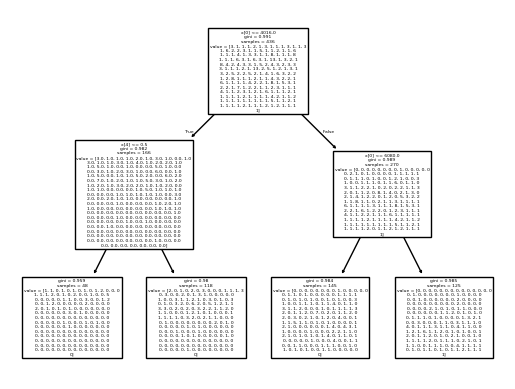

In [153]:
plot_tree(de)